In [1]:
import sampleClient
import realsense_sensor as sensor
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass

/home/ai/git/cv_pipeline


In [2]:
cam = sensor.RealsenseSensor("cfg/sensors/realsense_config.json")
cam.start()

2019-09-11 19:56:41.037 | INFO     | realsense_sensor:__init__:54 - Cam <pyrealsense2.device: Intel RealSense D435 (S/N: 837212070621)> connected.
2019-09-11 19:56:43.370 | INFO     | realsense_sensor:start:98 - Realsense stream started.
2019-09-11 19:56:43.372 | INFO     | realsense_sensor:start:99 - Advanced mode is True


In [3]:
img, d = cam.frames()

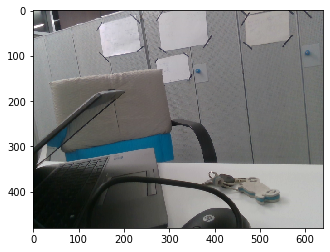

In [4]:
plt.imshow(img)

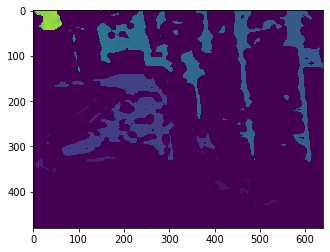

In [5]:
plt.imshow(d)

In [6]:
intrinsics = {
    "cx": cam._intrinsics.ppx,
    "cy": cam._intrinsics.ppy,
    "fx": cam._intrinsics.fx,
    "fy": cam._intrinsics.fy
}
print(intrinsics)

{'cx': 323.7543029785156, 'cy': 236.95787048339844, 'fx': 617.3400268554688, 'fy': 617.363037109375}


In [7]:
print('Shape of the depth image: ', np.shape(d))

Shape of the depth image:  (480, 640)


In [8]:
print('Shape of the color image: ', np.shape(img))

Shape of the color image:  (480, 640, 3)


In [9]:
segmask = sampleClient.predictMask(d, **intrinsics)

In [20]:
print(segmask)

{'class_ids': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32), 'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
 

In [21]:
sampleClient.predictRgb(img, **intrinsics)

{'class_ids': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=float32), 'masks': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ...

In [11]:
sampleClient.predictGQCNN_pj(img, d, **intrinsics)

{'angle': -2.983341310960104,
 'approachAngle': 0.0,
 'approachAxis': [0.0, 0.0, 1.0],
 'axis': [-0.9875043668171756, -0.9875043668171756],
 'depth': 1.2492460550860842,
 'q': 0.013209781609475613,
 'type': 'pj',
 'width': 0.05,
 'x': 266.95304340471773,
 'y': 236.11868434956395}

In [17]:
sampleClient.predictGQCNN_suction(img, d, **intrinsics)

{'angle': 2.3534628202782857,
 'approachAngle': 0.2529550347813005,
 'approachAxis': [-0.17744756598818096,
  -0.1764807482556217,
  0.9681771050897692],
 'axis': [-0.17744756598818096, -0.17744756598818096],
 'depth': 0.41315075755119324,
 'q': 0.7985363006591797,
 'type': 'suction',
 'x': 388.00164844462387,
 'y': 407.92415947279756}

In [23]:
sampleClient.predictFCGQCNN_pj(img, d, segmask['masks'][0], **intrinsics)

{'angle': 1.2762720155208536,
 'approachAngle': 0.0,
 'approachAxis': [0.0, 0.0, 1.0],
 'axis': [0.29028467725446233, 0.29028467725446233],
 'depth': 0.30488673981744796,
 'q': 0.476256787776947,
 'type': 'pj',
 'width': 0.05,
 'x': 100.0,
 'y': 224.0}

In [22]:
sampleClient.predictFCGQCNN_suction(img, d, segmask['masks'][0], **intrinsics)

{'angle': 0.49733445998100206,
 'approachAngle': 1.3423340648015325,
 'approachAxis': [-0.4646879512998587, 0.856020976753547, 0.22648001076175295],
 'axis': [-0.4646879512998587, -0.4646879512998587],
 'depth': 1.2260000705718994,
 'q': 0.020095933228731155,
 'type': 'suction',
 'x': 172.0,
 'y': 272.0}

In [3]:





#####


cam.stop()

True